In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob  # Para manejar múltiples archivos

# Configuración de seaborn para gráficos mas agradables
sns.set_theme(style="whitegrid")

In [16]:

files = glob.glob("stats-ej1-d/*.txt") # Recolectar archivos con métricas

data_list = []

for file in files:
    with open(file, 'r') as f:
        cache = None
        vias = None
        metrics = {}
        
        for line in f:
            line = line.strip()

            if line.startswith("cache"): # Si la línea es de cache o vias, extraer su valor
                cache = line.split()[1]
            elif line.startswith("vias"):
                vias = line.split()[1]
            elif line:
                parts = line.split()
                if len(parts) == 2:
                    metric, value = parts
                    metrics[metric] = float(value)
        
        metrics['cache'] = cache
        metrics['vias'] = vias

        data_list.append(pd.DataFrame([metrics])) # Añadir el diccionario de métricas a la lista como un DataFrame

data = pd.concat(data_list, ignore_index=True)

print(data.head())

grouped_data = data.groupby(['cache', 'vias']).mean().reset_index() # Agrupar por cache y vias y calcular la media

   system.cpu_cluster.cpus.numCycles  \
0                           188827.0   
1                           243009.0   
2                           218302.0   
3                           189255.0   
4                           218366.0   

   system.cpu_cluster.cpus.dcache.overallHits::total  \
0                                             4782.0   
1                                            10755.0   
2                                              698.0   
3                                             4781.0   
4                                              704.0   

   system.cpu_cluster.cpus.dcache.ReadReq.hits::total  \
0                                             4706.0    
1                                             7685.0    
2                                              470.0    
3                                             4714.0    
4                                              474.0    

   system.cpu_cluster.cpus.icache.overallHits::total  \
0                      

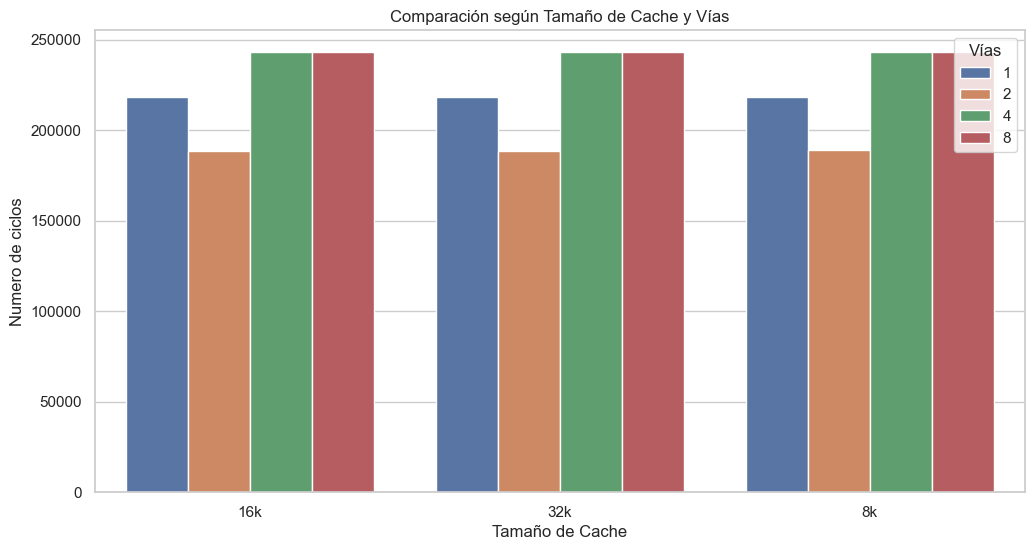

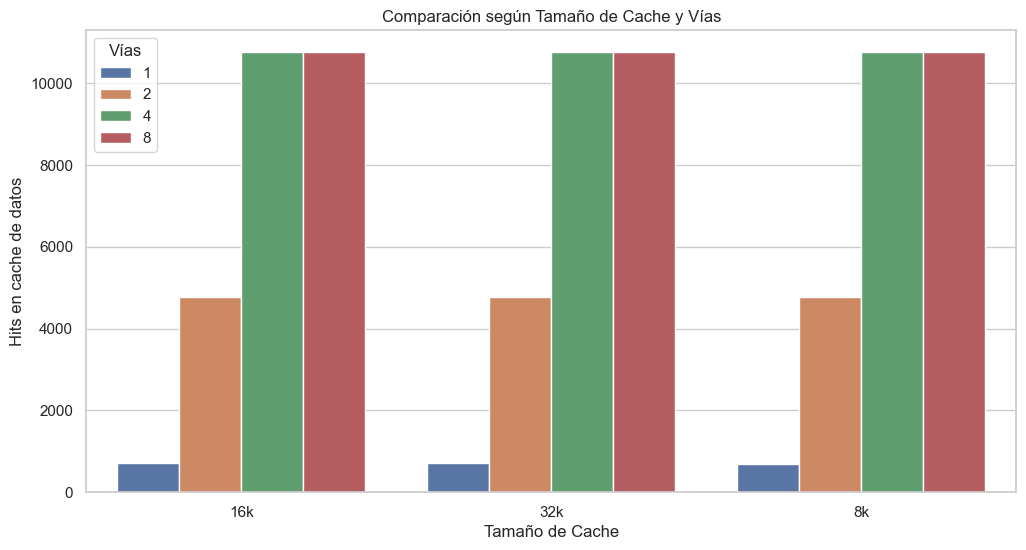

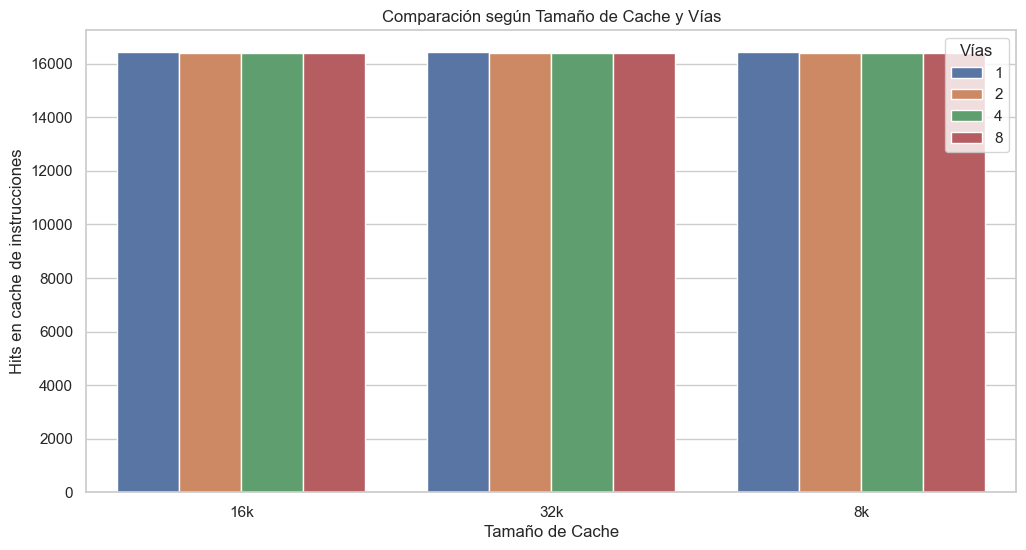

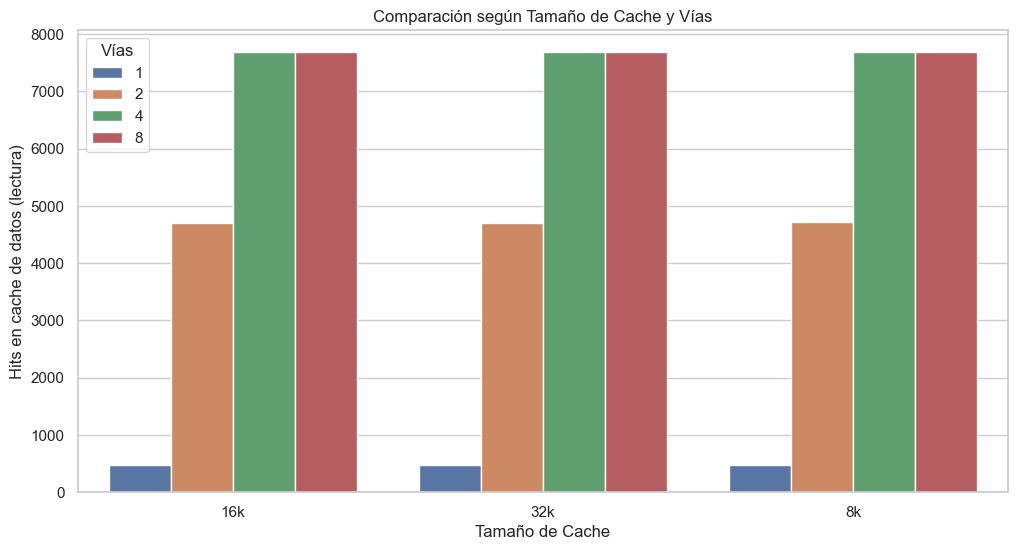

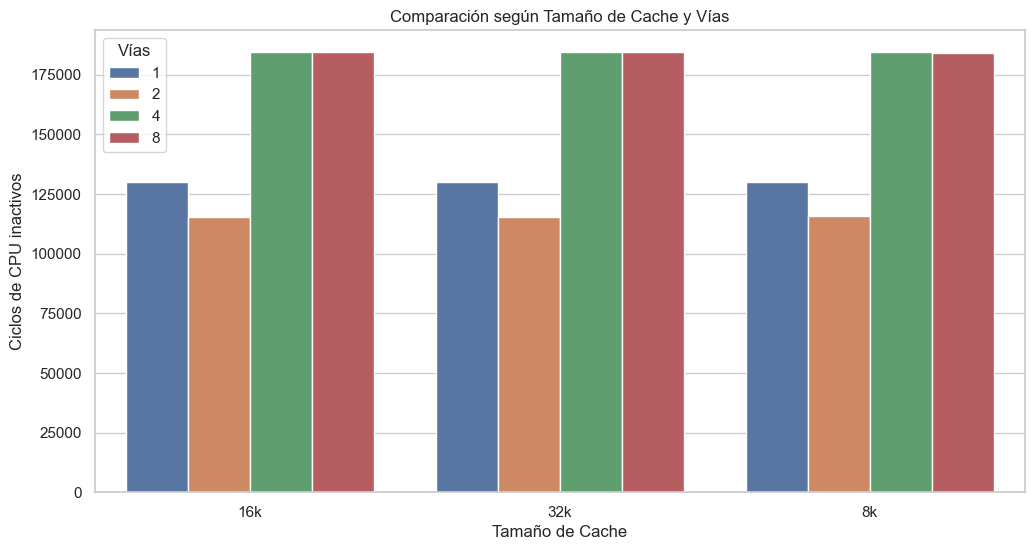

In [18]:
def generate_cache_barplot(y, alias, data):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=data, x='cache', y=y, hue='vias')
    plt.xlabel('Tamaño de Cache')
    plt.ylabel(alias)
    plt.title('Comparación según Tamaño de Cache y Vías')
    plt.legend(title="Vías")
    plt.show()

generate_cache_barplot('system.cpu_cluster.cpus.numCycles', 'Numero de ciclos', grouped_data)
generate_cache_barplot('system.cpu_cluster.cpus.dcache.overallHits::total', 'Hits en cache de datos', grouped_data)
generate_cache_barplot('system.cpu_cluster.cpus.icache.overallHits::total', 'Hits en cache de instrucciones', grouped_data)
generate_cache_barplot('system.cpu_cluster.cpus.dcache.ReadReq.hits::total', 'Hits en cache de datos (lectura)', grouped_data)
generate_cache_barplot('system.cpu_cluster.cpus.idleCycles', 'Ciclos de CPU inactivos', grouped_data)